# Week3授業課題 信用情報の分析
## テキストの目的
実データに近いものの分析を行う

データセットに対して自ら課題を設定できるようにする

## どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

In [1]:
import os # ファイルの読み込み先のpath指定する時に必要
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？

・Home Creditはどのような企業？
銀行にお金を借りれない人に対して、お金をかすサービスを提供している。
・このコンペティションでは何を予測する？
電話会社や取引情報などの様々な代替データを利用して、クライアントの返済能力を予測しています。
・それを予測することで企業が得られるメリットは何？
返済能力のある顧客を見極めることが出来、逆に返済能力のない顧客にはお金をかすリスクを減らせる。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

.head()、.info()、describe()などを使う  
欠損値の有無を見る  
クラスごとのデータ数をグラフに出す  
それぞれ結果に対する説明や考察も行ってください。

In [2]:
train = pd.read_csv("../../dic_ml_ans/application_train.csv")
# 先頭５行を表示させる
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 有効データ数、データ型、メモリ使用量を表示させる
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
train_0 = train[train["TARGET"] == 0]
train_1 = train[train["TARGET"] == 1]

In [5]:
# 数値データに対して各種統計量を計算
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# 欠損値の有無
train.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

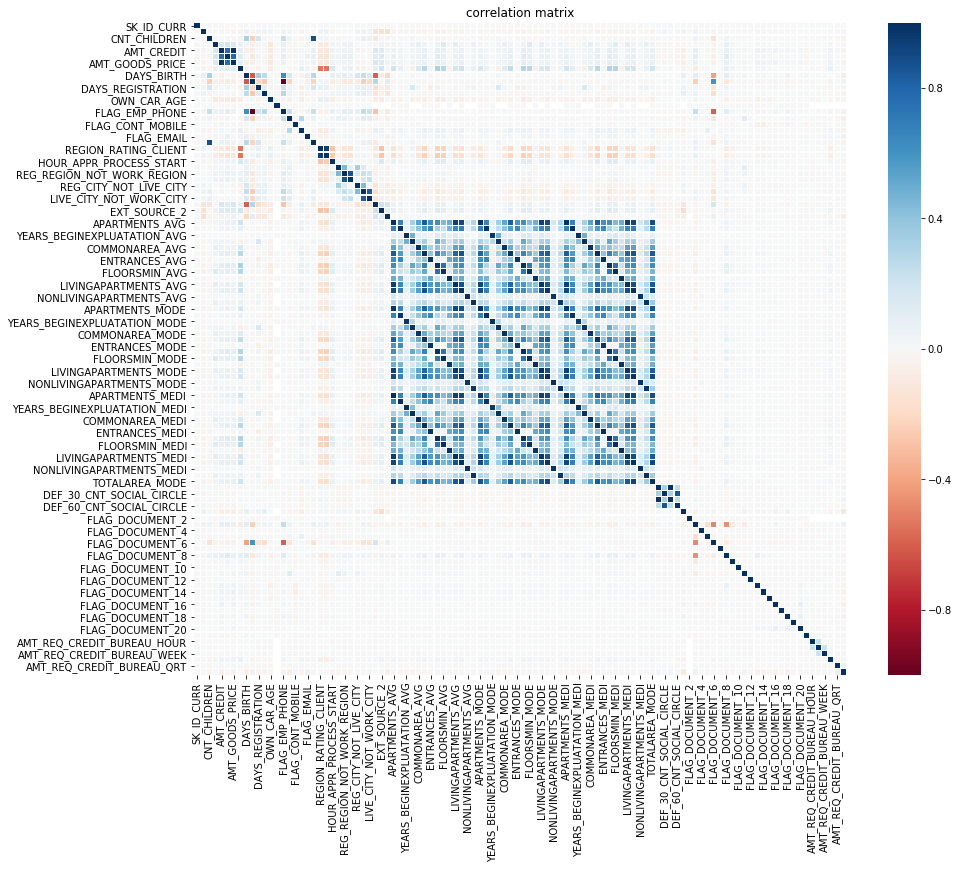

In [7]:
# クラス毎のデータ数をグラフに出す
df_corr = train.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15, 12))
plt.title("correlation matrix")
sns.heatmap(df_corr, linewidth=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=False)
plt.show()

### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

1.目的関数と相関が大きい特徴量は何？

2.逆に相関が小さい特徴量は何？

3.相関のありそうな特徴量と目的関数の関係について見てみたい。

### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。
考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [8]:
# 1.目的関数と相関が大きい特徴量は何？
# 目的関数（TARGET）だけ引っ張ってきて、値の高い順に並べる。
df_corr_target  = df_corr["TARGET"].sort_values(ascending=False)
print(df_corr_target[1:15])

# これは目的関数でしばれていないので、全特徴量が表示されてしまう。
# df_corr_target  = df_corr.sort_values("TARGET", ascending=False)
# print(df_corr_target[1:15])

# そもそも何でソートするかを書く必要があるのでコケる
# df_corr_target  = df_corr.sort_values(ascending=False)
# print(df_corr_target[1:15])

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64


In [9]:
# 2.逆に相関が小さい特徴量は何？
# 目的関数の下位20を表示。
print(df_corr_target[-20:-1])

AMT_CREDIT                   -0.030369
LIVINGAREA_MODE              -0.030685
ELEVATORS_MODE               -0.032131
TOTALAREA_MODE               -0.032596
FLOORSMIN_MODE               -0.032698
LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
Name: TARGET, dtype: float64


In [10]:
# 相関が無い特徴量ってどうなっているの？？
a = train[train["TARGET"] == 0]["CNT_CHILDREN"]
a

1         0
2         0
3         0
4         0
5         0
         ..
307505    0
307506    0
307507    0
307508    0
307510    0
Name: CNT_CHILDREN, Length: 282686, dtype: int64

In [11]:
# 3.相関のありそうな特徴量と目的関数の関係について見てみたい。
# 相関の高そうな目的関数、子持ち、収入、クレジットカード状態をピックアップしてみる。
train_test = train.loc[:, ["TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT"]]
train_test.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,1,0,202500.0,406597.5
1,0,0,270000.0,1293502.5
2,0,0,67500.0,135000.0
3,0,0,135000.0,312682.5
4,0,0,121500.0,513000.0


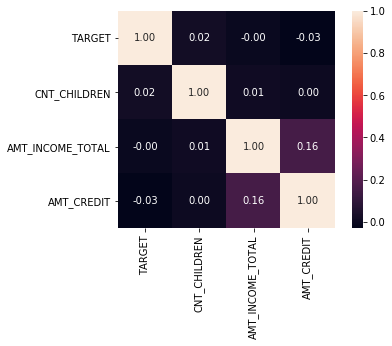

In [12]:
# ヒートマップ化してみる
train_test_corr = train_test.corr()

# annot: 数値を表示するか(annotation)
# square: 四角を正方形に合わせるか
# fmt: 表示する数値の形式(formatting)
# sns.heatmap(housing_data2_corr1[housing_data2_corr1>=0.8], annot=True, square=True, fmt='.2f')

sns.heatmap(train_test_corr, annot=True, square=True, fmt='.2f')

In [13]:
# 中身の確認
df_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


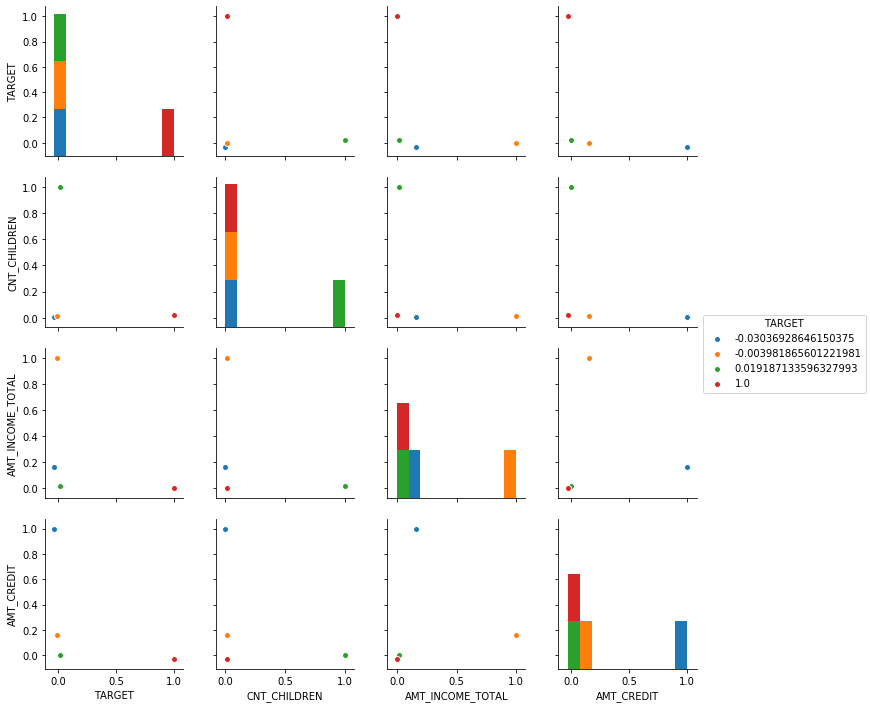

In [14]:
sns.pairplot(train_test_corr, hue='TARGET')b

In [ ]:
1.目的関数と相関が大きい特徴量は何？
誕生年月日や評価クライアント（おそらくhome credit 社の顧客）は返済能力と高い関係がありそう。
年配の方や普段から返済されている方（常連さん？）は返済能力が高い。携帯電話変更も相関が高いのが不思議。

2.逆に相関が小さい特徴量は何？
日雇いの方、部屋の広さ、人口密度等は返済能力が低い事に関係がありように見える。
部屋の広さの話はわからないが、給与が安定しない方や、集合住宅に住んでいる方は説得力がある。

3.相関のありそうな特徴量と目的関数の関係について見てみたい。
子供と収入よりも、クレジットカードと

### 【問題5】（アドバンス課題）カーネルへの投稿
必須ではありませんが、コンペティションのKernelページに今回作成したEDAのノートブックを投稿することを推奨しています。

投稿するもエラーが出た。。
とりあえずやり方だけは分かったので良しとする。